In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [2]:
path = os.getcwd()
abspath = os.path.abspath(os.path.join(path, os.pardir))

In [3]:
pathImageFolder = abspath + '/imagesV3'                             
folderList = os.listdir(pathImageFolder)

In [4]:
imagesCropV3 = abspath + '/imagesCropV3'

if not os.path.exists(imagesCropV3):
            os.mkdir(imagesCropV3)

In [5]:
face_model = cv2.CascadeClassifier(f'{abspath}/odm_MASKS/input/haarcascades/haarcascade_frontalface_default.xml')

AngelaMerkel


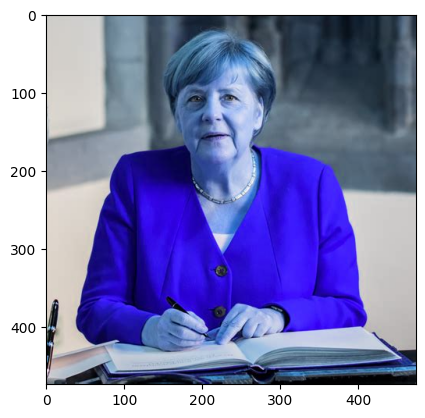

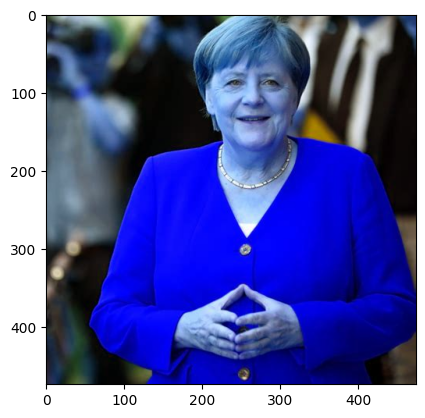

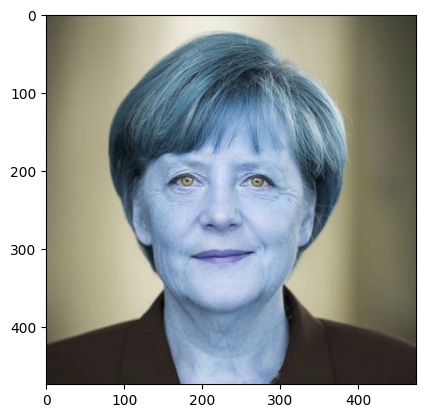

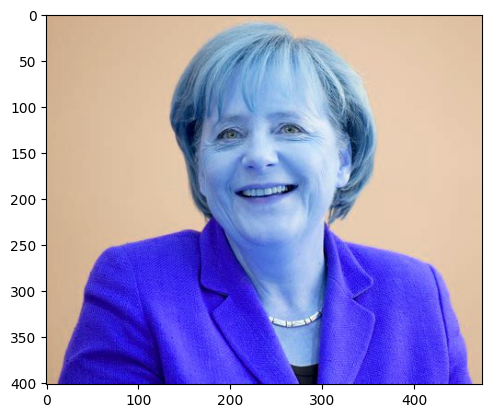

error: OpenCV(4.5.5) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [131]:
for folder in folderList:
   
    pathFolder = pathImageFolder + '/' + folder 
    imageFolder = pathFolder + '/images/'
    
    myFiles = [f for f in os.listdir(imageFolder) if f.endswith('.jpg')]
    
    print(folder)
    
    path = imagesCropV3 + '/' + folder
    if not os.path.exists(path):
            os.mkdir(path)
    
    for file in range(len(myFiles)):
        
        file_name = myFiles[file]
        try:
            #crop
            img = cv2.imread(imageFolder + file_name)
            img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
            plt.imshow(img)
            
            faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=20)
            
            out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                        
            for (x,y,w,h) in faces:
                #i = cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
                
                out_img = out_img[y:y+h,x:x+w]
                
                #plt.imshow(out_img)
                plt.show()
            
                cv2.imwrite(path + '/' + file_name, out_img)
        except ValueError:
            print(ValueError)
            print(file_name)

In [381]:
!pip install deepface
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
!pip install cmake
!pip install dlib

In [404]:
original = '/tf/src/imagesUnknown/imagesUnknownOriginal/'
cropped = '/tf/src/imagesUnknown/imagesUnknownCropped2/'

In [410]:
myFiles = [f for f in os.listdir(original) if f.endswith('.jpg')]
    
for file in range(len(myFiles)):
        
    if not os.path.exists(cropped):
        os.mkdir(cropped)
    
    file_name = myFiles[file]
    try:
            #face = DeepFace.detectFace(img_path = imageFolder + file_name, target_size = (224, 224), detector_backend = "dlib")
            
            
        img = cv2.imread(original + file_name)
            
        faces = RetinaFace.detect_faces(img)
            
            #print(faces)
            
        for i in range(len(faces)):
            face = faces[f'face_{i+1}']['facial_area']
            (xmin,ymin,xmax,ymax) = face
            crop = img[ymin:ymax,xmin:xmax]
            crop = cv2.resize(crop,(224,224))
                
        plt.imsave(cropped + file_name, cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))
    except ValueError:
        print(ValueError)
        print(file_name)
            
    except TypeError:
        print(file_name)

real_00009.jpg
real_00029.jpg
real_00033.jpg
real_00034.jpg
real_00061.jpg
real_00063.jpg
real_00077.jpg
real_00094.jpg
real_00099.jpg
real_00105.jpg
real_00121.jpg
real_00128.jpg
real_00129.jpg
real_00133.jpg
real_00155.jpg
real_00200.jpg
real_00202.jpg
real_00203.jpg
real_00204.jpg
real_00217.jpg
real_00219.jpg
real_00224.jpg
real_00269.jpg
real_00329.jpg
real_00344.jpg
real_00375.jpg
real_00390.jpg
real_00419.jpg
real_00422.jpg
real_00423.jpg
real_00433.jpg
real_00444.jpg
real_00463.jpg
real_00479.jpg
real_00482.jpg
real_00484.jpg
real_00511.jpg
real_00522.jpg
real_00568.jpg
real_00576.jpg
real_00580.jpg
real_00607.jpg
real_00608.jpg
real_00627.jpg
real_00636.jpg
real_00649.jpg
real_00670.jpg
real_00686.jpg
real_00688.jpg
real_00705.jpg
real_00722.jpg
real_00728.jpg
real_00743.jpg
real_00761.jpg
real_00783.jpg
real_00787.jpg
real_00803.jpg
real_00818.jpg
real_00825.jpg
real_00847.jpg
real_00860.jpg
real_00867.jpg
real_00873.jpg
real_00880.jpg
real_00885.jpg
real_00888.jpg
real_00894

In [58]:
dir_list = os.listdir(pathImageFolder)
print(len(dir_list))

NameError: name 'pathImageFolder' is not defined

In [4]:
import shutil
import numpy as np
import random

In [389]:
dataset = f'{abspath}/datasetV4' 
if not os.path.exists(dataset):
    print(dataset)
    os.mkdir(dataset)
    os.mkdir(f'{dataset}/train')
    os.mkdir(f'{dataset}/val')
    os.mkdir(f'{dataset}/test')
    
print(os.listdir(dataset + '/test'))

/tf/src/datasetV4
[]


In [392]:
for folder in folderList:
    print(folder)
    pathFolder = pathImageFolder + '/' + folder 
    imageFolder = pathFolder + '/crop3/'
    #labelFolder = pathFolder + '/labels/' 
    myFiles = [f for f in os.listdir(imageFolder) if f.endswith('.jpg')]
    random.shuffle(myFiles)
    
    for i, file in enumerate(myFiles):
        if(i <= int(len(myFiles) * 0.7)):
            if not os.path.exists(f'{dataset}/train/{folder}'):
                os.mkdir(f'{dataset}/train/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/train/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/train')
        elif(i > int(len(myFiles) * 0.7) and i <= int(len(myFiles) * 0.85)):
            if not os.path.exists(f'{dataset}/val/{folder}'):
                os.mkdir(f'{dataset}/val/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/val/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/val')
        else:
            if not os.path.exists(f'{dataset}/test/{folder}'):
                os.mkdir(f'{dataset}/test/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/test/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/test')


AlvaroSoler
AmanaSeyfried
AngelinaJolie
AnnaFaris
ArianaGrande
BillGates
BradPitt
DieterBohlen
EllenDegeneres
HillaryClinton
JuliaRoberts
JustinBieber
LadyGaga
MarkForster
MilesCyrus
RyanGosling
ShawnMendes
WarrenBuffett


In [411]:
    imageFolder = '/tf/src/imagesUnknown/imagesUnknownCropped2'
    folder = 'Unknown'

    myFiles = [f for f in os.listdir(imageFolder) if f.endswith('.jpg')]
    random.shuffle(myFiles)
    
    for i, file in enumerate(myFiles):
        if(i <= int(len(myFiles) * 0.7)):
            if not os.path.exists(f'{dataset}/train/{folder}'):
                os.mkdir(f'{dataset}/train/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/train/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/train')
        elif(i > int(len(myFiles) * 0.7) and i <= int(len(myFiles) * 0.85)):
            if not os.path.exists(f'{dataset}/val/{folder}'):
                os.mkdir(f'{dataset}/val/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/val/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/val')
        else:
            if not os.path.exists(f'{dataset}/test/{folder}'):
                os.mkdir(f'{dataset}/test/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/test/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/test')


In [412]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rows=224  #Number of Pixels in the Rows for Input. 
cols=224  #Number of Pixels in Columns for Output

In [413]:
trained_model=MobileNetV2(input_shape=(rows,cols,3),           
                    include_top=False,
                    weights='imagenet')   


trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
    
trained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [414]:
last_layer=trained_model.get_layer('out_relu')   
last_layer_output=last_layer.output  

In [415]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
                                 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(f'{dataset}/train',
                                                  target_size=(rows,cols),
                                                  class_mode='categorical')

test_generator=test_datagen.flow_from_directory(f'{dataset}/test',
                                                target_size=(rows,cols),
                                                class_mode='categorical')

Found 15917 images belonging to 73 classes.
Found 6610 images belonging to 73 classes.


In [416]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
#Add a Dropout layer.
x = tf.keras.layers.Dropout(0.2)(x)                      
# Add a final softmax layer for classification.
x = tf.keras.layers.Dense(73,activation='softmax')(x)


# todo inject labels?
# https://stackoverflow.com/questions/44310448/attaching-class-labels-to-a-keras-model

model = tf.keras.Model(trained_model.input,x) 

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
#Summary of the model.
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [417]:
result=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=15,
                 verbose=1)

Epoch 1/15
498/498 [==============================] - 176s 348ms/step - loss: 3.0422 - accuracy: 0.2832 - val_loss: 4.4065 - val_accuracy: 0.0890
Epoch 2/15
498/498 [==============================] - 126s 252ms/step - loss: 1.4845 - accuracy: 0.6292 - val_loss: 1.9403 - val_accuracy: 0.5009
Epoch 3/15
498/498 [==============================] - 129s 259ms/step - loss: 1.0277 - accuracy: 0.7484 - val_loss: 1.3015 - val_accuracy: 0.6753
Epoch 4/15
498/498 [==============================] - 125s 250ms/step - loss: 0.8050 - accuracy: 0.8025 - val_loss: 1.0414 - val_accuracy: 0.7422
Epoch 5/15
498/498 [==============================] - 130s 260ms/step - loss: 0.6819 - accuracy: 0.8330 - val_loss: 0.9024 - val_accuracy: 0.7844
Epoch 6/15
498/498 [==============================] - 125s 250ms/step - loss: 0.5871 - accuracy: 0.8550 - val_loss: 0.9004 - val_accuracy: 0.7844
Epoch 7/15
498/498 [==============================] - 130s 260ms/step - loss: 0.5110 - accuracy: 0.8742 - val_loss: 0.8162 -

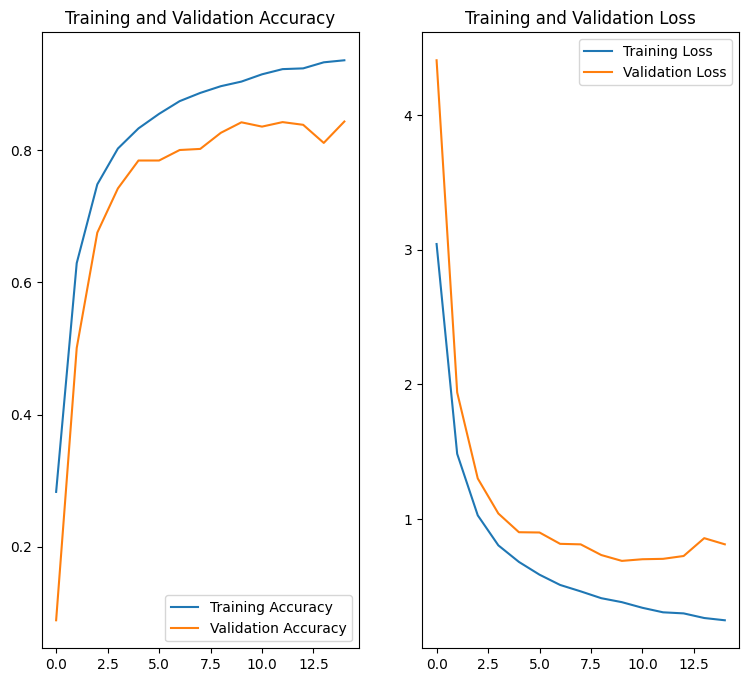

In [418]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(9, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [419]:
model.save(f'{abspath}/models/classification/newClass/v8/')

In [420]:
model.evaluate(test_generator)

207/207 [==============================] - 15s 73ms/step - loss: 0.8127 - accuracy: 0.8434


[0.8127024173736572, 0.843419075012207]

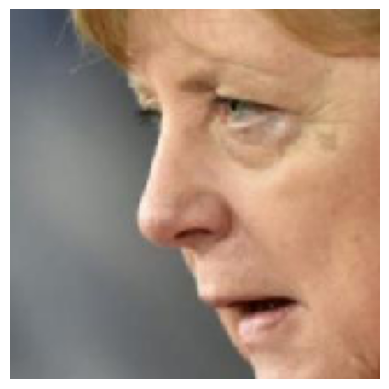

array([[9.8166013e-01, 4.2981401e-07, 2.0288564e-06, 3.7241723e-08,
        2.3597099e-07, 2.2371998e-04, 2.8918098e-06, 1.4127056e-07,
        4.6139013e-09, 7.0485692e-07, 6.4427348e-09, 1.5203915e-04,
        6.4104298e-11, 6.5332088e-08, 9.8038306e-03, 1.0196596e-08,
        3.2806367e-04, 1.8633572e-06, 3.3843375e-09, 4.3529584e-09,
        8.1775015e-06, 1.4219265e-09, 1.2279698e-09, 9.5912045e-10,
        1.5733133e-06, 6.2677199e-03, 8.4875779e-08, 4.3168927e-07,
        5.3564083e-08, 6.0105687e-10, 4.7049917e-07, 1.6358744e-10,
        2.7469124e-08, 7.3213317e-07, 8.1800820e-08, 4.8680043e-08,
        1.1548385e-06, 9.2618080e-08, 6.1213450e-07, 2.8065132e-08,
        2.9609814e-07, 3.4444277e-08, 5.3595357e-08, 6.8713329e-10,
        1.4295591e-06, 3.1035643e-09, 2.8087113e-06, 2.1127362e-09,
        8.1851974e-09, 1.2459245e-03, 3.1820147e-07, 2.4574056e-05,
        2.2234497e-07, 1.6382803e-08, 3.1517347e-09, 1.2813961e-04,
        1.3867185e-04]], dtype=float32)

In [53]:

from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

img_path = ("/tf/src/imagesV2/AngelaMerkel/crop/208_f68dc61e.jpg")
#img_path1 = ("/tf/src/imagesV2/AngelaMerkel/images/020_1081558b.jpg")

img = image.load_img(img_path, target_size=(160, 160))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

model.predict(img_tensor)


In [99]:
# Modify 'test1.jpg' and 'test2.jpg' to the images you want to predict on

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 320, 240

# predicting images
img = image.load_img(img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print( classes)

# predicting multiple images at once
img = image.load_img(img_path1, target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict(images, batch_size=10)

# print the classes, the images belong to
print(classes)
print("################")
print(classes[0])
print("################")
print(classes[0][0])

[[7.8614719e-02 3.0716665e-03 1.3464162e-04 6.1391603e-02 1.0740819e-03
  2.5264805e-03 2.4355503e-03 2.3148009e-03 5.8368258e-03 5.3229049e-04
  6.5882044e-04 7.5056439e-04 5.1975349e-04 1.3345250e-04 1.7097190e-03
  1.4481526e-03 3.2012081e-01 7.3439971e-04 8.5620441e-06 6.5251224e-05
  1.5624959e-04 3.5229513e-01 3.0477528e-02 1.9466655e-02 8.5100373e-03
  1.2048504e-03 2.0910611e-03 2.2441587e-04 2.1017782e-04 1.2921351e-03
  2.9334094e-04 8.4119922e-05 1.5549312e-03 4.4763103e-02 1.5245200e-04
  2.9038484e-03 7.7017727e-03 6.7930983e-04 1.2398083e-02 5.3978543e-05
  8.8100365e-05 5.1410282e-03 8.3292834e-04 2.3580778e-05 1.6640433e-05
  9.1232862e-03 1.6909197e-04 2.1196267e-04 1.3231285e-04 2.8451732e-03
  1.6754391e-04 2.0411825e-03 5.7477038e-04 3.6613405e-05 2.7043144e-03
  5.2961824e-03]]
[[7.8783706e-02 3.0925244e-03 1.3508736e-04 6.1708618e-02 1.0787543e-03
  2.5431241e-03 2.4454622e-03 2.3204121e-03 5.8618905e-03 5.3575903e-04
  6.6106196e-04 7.5358688e-04 5.2175799e-04 1.

In [71]:
import numpy as np
from keras.preprocessing import image

img_path = ("/tf/src/imagesV2/AngelaMerkel/crop/192_b175b5c4.jpg")

img_width, img_height = 128, 128
img = image.load_img(img_path, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

pred = model.predict(img)
print(pred)

maxP = np.argmax(pred)
print(maxP)

[[0. 1.]]
1


In [ ]:
####################################################

In [270]:
import os
import ffmpeg
import numpy as np
path = os.getcwd()
abspath = os.path.abspath(os.path.join(path, os.pardir))

inputPath = f'{abspath}/ffmpegTest/'
print(inputPath)

#in_filename = inputPath + 'merkel2.mp4'
#out_filename = f'{inputPath}videoTest.mp4'
in_filename = f'{abspath}/ffmpegTest/raab_Trim.mp4'
out_filename = f'{abspath}/ffmpegTest/raab_Trim_NEW_V2_out6.mp4'
#audio_out_filename = f'{abspath}/ffmpegTest/SBL6Audio.mp4'
#complete_filename = f'{abspath}/ffmpegTest/SBL6Complete.mp4'

out_path = inputPath + 'frames/'
overlay_filename = inputPath + 'pic.png'

/tf/src/ffmpegTest/


In [529]:
from tensorflow import keras
model = keras.models.load_model(f'{abspath}/models/maskModel/v4/masknet.h5')
classifier = keras.models.load_model(f'{abspath}/models/classification/newClass/v8/') #v6

In [291]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier(f'{abspath}/odm_MASKS/input/haarcascades/haarcascade_frontalface_default.xml')
#face_model2 = cv2.CascadeClassifier(f'{abspath}/odm_MASKS/input/haarcascades/haarcascade_profileface.xml')

In [423]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [36]:
# todo labels inject into model
import os

text_file = open("./assets/list_promis.txt", "r")
query_array = text_file.read().split(',\n')
query_array.append("Unknown")
query_array = sorted(query_array)
print(query_array)

['AlvaroSoler', 'AmanaSeyfried', 'AngelaMerkel', 'AngelinaJolie', 'AnnaFaris', 'AnnalenaBaerbock', 'AnthonyFauci', 'ArianaGrande', 'ArnoldSchwarzenegger', 'BarackObama', 'BenedictCumberbatch', 'BillGates', 'BradPitt', 'ChadwickBoseman', 'ChrisHemsworth', 'ChrisPratt', 'ChristianBale', 'ChristianLindner', 'CristianoRonaldo', 'DenzelWashington', 'DieterBohlen', 'DonaldTrump', 'DwayneJohnson', 'EdSheeran', 'EllenDegeneres', 'ElonMusk', "ElyasM'barek", 'GeorgeClooney', 'GüntherJauch', 'HeidiKlum', 'HeleneFischer', 'HillaryClinton', 'JasonMomoa', 'JeffBezos', 'JoeBiden', 'JudithRakers', 'JuliaRoberts', 'JustinBieber', 'KarlLauterbach', 'KobeBryant', 'LadyGaga', 'LeBronJames', 'LeonardoDiCaprio', 'LewisHamilton', 'LionelMessi', 'MacKenzieScott', 'ManuelNeuer', 'MarkForster', 'MaxVerstappen', 'MichaelJackson', 'MichaelJordan', 'MilesCyrus', 'MorganFreeman', 'NovakDjokovic', 'OlafScholz', 'RobertDowneyJr', 'RogerFederer', 'RyanGosling', 'SebastianVettel', "ShaquilleO'Neal", 'ShawnMendes', 'Ste

In [191]:
!pip install retina-face

In [487]:
from retinaface import RetinaFace

{'face_1': {'score': 0.999783456325531, 'facial_area': [1079, 308, 1385, 689], 'landmarks': {'right_eye': [1126.3395, 471.75058], 'left_eye': [1255.8419, 479.4673], 'nose': [1167.6544, 571.3065], 'mouth_right': [1150.8916, 607.7683], 'mouth_left': [1251.5913, 614.2168]}}}
[1079, 308, 1385, 689]
2222
[[0.82981616 0.2748772 ]]
0.82981616


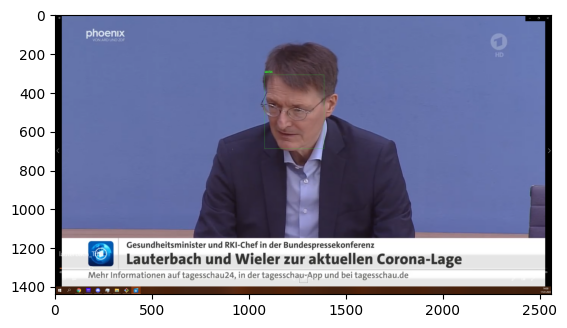

In [494]:

    try:
        #img = cv2.imread('/tf/src/imagesV2/OlafScholz/images/003_3361b3a5.jpg')
        img = cv2.imread('/tf/src/test/lt2.png')
        plt.imshow(img)
        imgGrey = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
        #faces = face_model.detectMultiScale(imgGrey, scaleFactor=1.2, minNeighbors=8)
        
        faces = RetinaFace.detect_faces(img)
        
        print(faces)
        
    
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
                        
        for i in range(len(faces)):
            
            face = faces[f"face_{i+1}"]["facial_area"]
            print(face)
            
            
            
            
            (xmin,ymin,xmax,ymax) = face
            
            crop = new_img[ymin:ymax,xmin:xmax]
            crop = cv2.resize(crop,(224,224))
            crop = np.reshape(crop,[1,224,224,3])/255.0
             
            #crop = new_img[ymin:ymax,xmin:xmax]
            #crop = cv2.resize(crop,(128,128))
            #plt.imshow(crop)
            #plt.show()
            
            #crop2 = new_img[ymin:ymax,xmin:xmax]
            #crop2 = cv2.resize(crop2,(224,224))
            #plt.imshow(crop2)
            #plt.show()
            
            #crop3 = new_img[ymin:ymax,xmin:xmax]
            #crop3 = cv2.resize(crop2,(160,160))
            #plt.imshow(crop3)
            #plt.show()
            
            #crop = np.reshape(crop,[1,128,128,3])/255.0
            #crop2 = np.reshape(crop2,[1,224,224,3])/255.0
            
            
            print("2222")
            
            
            
            mask_result = model.predict(crop)
            
            
            
            #(x,y,w,h) = faces[i]
            #crop = new_img[y:y+h,x:x+w]
            #crop = cv2.resize(crop,(128,128))
            #crop2 = new_img[y:y+h,x:x+w]
            #crop2 = cv2.resize(crop2,(160,160))
            #crop = np.reshape(crop,[1,128,128,3])/255.0
            #crop2 = np.reshape(crop2,[1,160,160,3])/255.0
            #mask_result = model.predict(crop)
            
            print(mask_result)
            print(mask_result[0][mask_result.argmax()])
            
            if mask_result[0][mask_result.argmax()] > 0.6:
                if mask_label[mask_result.argmax()] == "MASK":
                    cv2.putText(new_img,mask_label[mask_result.argmax()],(xmin, ymin-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,205,50),2)
                    cv2.rectangle(new_img,(xmin,ymin),(xmax,ymax),(50,205,50),1)
                    plt.imshow(new_img)
                if mask_label[mask_result.argmax()] == "NO MASK":
                    # klassifizierer
                    y_prob = classifier.predict(crop) 
                    y_classes = y_prob.argmax(axis=-1)
                    if y_prob[0][y_classes][0] > 0.1:
                        label = query_array[y_classes[0]]
                        cv2.putText(new_img,label + " " + str(y_prob[0][y_classes][0]),(xmin, ymin-10),
                                    cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,205,50),2)
                        cv2.rectangle(new_img,(xmin,ymin),(xmax,ymax),(50,205,50),1)
                        plt.imshow(new_img)
                        print(label + " " + str(y_prob[0][y_classes][0]))

                    
                
                
        plt.show()
        
        #cv2.imwrite(frameOutput + frame, cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR))   #whole frame with every rect
    except ValueError:
        print(ValueError)

In [369]:
def detect2(in_frame):
    try:
        img = in_frame
        imgGrey = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
        faces = face_model.detectMultiScale(imgGrey, scaleFactor=1.2, minNeighbors=8)
        
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
        
        #print(faces)
                        
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            crop = new_img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(128,128))
            
            crop2 = new_img[y:y+h,x:x+w]
            crop2 = cv2.resize(crop2,(224,224))
            
            crop = np.reshape(crop,[1,128,128,3])/255.0
            crop2 = np.reshape(crop2,[1,224,224,3])/255.0
            
            #print(i)
            mask_result = model.predict(crop)
            
            #print(mask_result)
            #print(mask_result.argmax())
            
            #print(mask_result[0][mask_result.argmax()])
            
            
            if mask_result[0][mask_result.argmax()] > 0.6:
                if mask_label[mask_result.argmax()] == "MASK":
                    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,205,50),2)
                    cv2.rectangle(new_img,(x,y),(x+w,y+h),(50,205,50),1)
                if mask_label[mask_result.argmax()] == "NO MASK":
                    # klassifizierer
                    y_prob = classifier.predict(crop2) 
                    y_classes = y_prob.argmax(axis=-1)
                    if y_prob[0][y_classes][0] > 0.6:
                        label = query_array[y_classes[0]]
                        cv2.putText(new_img,label + " " + str(y_prob[0][y_classes][0]),(x, y-10),
                                    cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,205,50),2)
                        cv2.rectangle(new_img,(x,y),(x+w,y+h),(50,205,50),1)

        return cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        
    except ValueError:
        print(ValueError)
        print(framePath + frame)

In [447]:
def detect(in_frame):
    try:
        img = in_frame
        imgGrey = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
        #faces = face_model.detectMultiScale(imgGrey, scaleFactor=1.2, minNeighbors=8)
        
        faces = RetinaFace.detect_faces(img)
        
        #print(faces)
        
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
                        
        for i in range(len(faces)):
            
            #print(i)
            
            face = faces[f'face_{i+1}']['facial_area']
            #print(face)
            
            (xmin,ymin,xmax,ymax) = face
            
            crop = new_img[ymin:ymax,xmin:xmax]
            crop = cv2.resize(crop,(224,224))
            crop = np.reshape(crop,[1,224,224,3])/255.0
             
            #crop = new_img[ymin:ymax,xmin:xmax]
            #crop = cv2.resize(crop,(128,128))
            #crop2 = new_img[ymin:ymax,xmin:xmax]
            #crop2 = cv2.resize(crop2,(224,224)) #160->224
            #crop = np.reshape(crop,[1,128,128,3])/255.0
            #crop2 = np.reshape(crop2,[1,224,224,3])/255.0
            
            mask_result = model.predict(crop)
            
            print(mask_result[0])
            
            if mask_result[0][mask_result.argmax()] > 0.6:
                if mask_label[mask_result.argmax()] == "MASK":
                    cv2.putText(new_img,mask_label[mask_result.argmax()],(xmin, ymin-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,205,50),2)
                    cv2.rectangle(new_img,(xmin,ymin),(xmax,ymax),(50,205,50),1)
                    #plt.imshow(new_img)
                if mask_label[mask_result.argmax()] == "NO MASK":
                    # klassifizierer
                    y_prob = classifier.predict(crop) 
                    y_classes = y_prob.argmax(axis=-1)
                    if y_prob[0][y_classes][0] > 0.4:
                        label = query_array[y_classes[0]]
                        print(label)
                        cv2.putText(new_img,label + " " + str(y_prob[0][y_classes][0]),(xmin, ymin-10),
                                    cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,205,50),2)
                        cv2.rectangle(new_img,(xmin,ymin),(xmax,ymax),(50,205,50),1)
                        #plt.imshow(new_img)
                        print(label + " " + str(y_prob[0][y_classes][0]))

                
        return cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        
    except ValueError:
        print(ValueError)
        print(framePath + frame)
        
    except TypeError:
        return cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)

In [82]:
from tensorflow import keras
OC_Net = cv2.dnn.readNetFromCaffe(f"{abspath}/NewMaskODM/caffe/architecture.txt", f'{abspath}/NewMaskODM/caffe/weights.caffemodel')
model_mobile = keras.models.load_model(f"{abspath}/NewMaskODM/models/v2/")
classifier = keras.models.load_model(f'{abspath}/models/classification/newClass/v8/') #v6
model = model_mobile
img_size = 224

In [157]:
def extract_face(face):
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

def get_label(frame,img_size):
    im = cv2.resize(frame,(img_size,img_size))
    im = np.array(im)/255.0
    im = im.reshape(1,img_size,img_size,3)
    result = model.predict(im)
    label_Y=1 if result>0.3 else 0
    return label_Y,result

In [ ]:
# adjust image darker and light 
adjust_light,rows,cols = 2.2,3,2
figure= plt.figure(figsize = (14,14))
axes = []
assign = {'0':'Mask','1':"No Mask"}
face_list = [] # save no mask


def detect3(in_frame):
    print(in_frame)
    try:
        image = in_frame
        resultIMG = in_frame
        
        back_image = image
        image = cv2.LUT(image.astype(np.uint8), np.array([((i / 255.0) ** (1.0 / adjust_light)) * 255 for i in np.arange(0, 256)]).astype(np.uint8))
        blob = cv2.dnn.blobFromImage(image=cv2.resize(image, (300,300)), scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
       
        OC_Net.setInput(blob)
        detections = OC_Net.forward()
        length = detections.shape[2]
        (hight, width) = image.shape[:2]
                        
        for i in range(0, length):
            
            # get the face box
            boxs = detections[0, 0, i, 3:7] * np.array([width, hight, width, hight])
            (startX, startY, endX, endY) = boxs.astype("int")
            frame = image[startY:endY, startX:endX]
        
            # according to the confidence_threshold, to get the lable
            confidence_threshold = detections[0, 0, i, 2]
            if confidence_threshold > 0.2:
                label_Y,result = get_label(frame,img_size)
                print(label_Y)
           
                # add the Text
                cv2.rectangle(resultIMG, (startX, startY), (endX, endY), (0, 0, 255), 2)
                cv2.putText(resultIMG, assign[str(label_Y)] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)
            
                ## save nomask people mesage
                if(label_Y==1):
                    print("1")

            #axes.append(figure.add_subplot(rows, cols, j+1))
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
        #plt.show()
        #print(image)
        
        return resultIMG
        
    except ValueError:
        print(ValueError)
        print(framePath + frame)
        
    except TypeError:
        return cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)

In [210]:
def colorPercentage(pct):
    pct_diff = 1.0 - pct
    r = min(255, pct_diff*2 * 255)
    g = min(255, pct*2 * 255)
    return (r, g, 0)

In [211]:
# adjust image darker and light 
adjust_light,rows,cols = 2.2,3,2
#igure= plt.figure(figsize = (14,14))
axes = []
assign = {'0':'Mask','1':"No Mask"}
face_list = [] # save no mask


def detect4(in_frame):
    #rint(in_frame)
    try:
        image = in_frame
        resultIMG = in_frame
        
        back_image = image
        image = cv2.LUT(image.astype(np.uint8), np.array([((i / 255.0) ** (1.0 / adjust_light)) * 255 for i in np.arange(0, 256)]).astype(np.uint8))
        blob = cv2.dnn.blobFromImage(image=cv2.resize(image, (300,300)), scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
       
        OC_Net.setInput(blob)
        detections = OC_Net.forward()
        length = detections.shape[2]
        (height, width) = image.shape[:2]
                        
        for i in range(0, length):
            
            # get the face box
            boxs = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = boxs.astype("int")
            
            
            
            #print((startX, startY, endX, endY))
            frame = image[startY:endY, startX:endX]
            #print(frame)
        
            # according to the confidence_threshold, to get the lable
            confidence_threshold = detections[0, 0, i, 2]
            if confidence_threshold > 0.2:
                #rint(img_size)
                #print(frame[0])
                label_Y,result = get_label(frame,img_size)
                #rint(label_Y,result)
                
                if (label_Y == 1):
                    frame = cv2.resize(frame,(224,224))
                    frame = np.reshape(frame,[1,224,224,3])/255.0
                    y_prob = classifier.predict(frame)
                    y_classes = y_prob.argmax(axis=-1)
                    prob = y_prob[0][y_classes][0]
                    
                    label = query_array[y_classes[0]]
                        
                    cv2.rectangle(resultIMG, (startX, startY), (endX, endY), (0, 0, 255), 2)
                    cv2.putText(resultIMG, f'{label}: ' + "{:.4}".format(float(prob)) , 
                                    (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1, colorPercentage(prob),2)

                    
                else:
                # add the Text
                    cv2.rectangle(resultIMG, (startX, startY), (endX, endY), (0, 0, 255), 2)
                    cv2.putText(resultIMG, assign[str(label_Y)] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 2)

            #axes.append(figure.add_subplot(rows, cols, 1))
            #lt.imshow(cv2.cvtColor(resultIMG, cv2.COLOR_BGR2RGB))
            
        #lt.show()
        #print(image)
        
        return resultIMG
        
    except ValueError:
        print(ValueError)
        print(framePath + frame)
        
    except Exception as e:
        print(e)
        return in_frame
        
    except TypeError:
        return in_frame

0.96647847


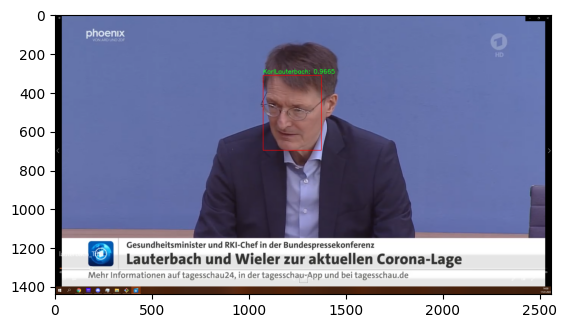

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[15, 33, 66],
        [16, 34, 67],
        [15, 33, 66],
        ...,
        [14, 33, 66],
        [14, 33, 66],
        [14, 33, 66]],

       [[15, 33, 66],
        [13, 31, 64],
        [13, 31, 64],
        ...,
        [14, 33, 66],
        [17, 35, 68],
        [12, 31, 64]],

       [[14, 32, 65],
        [13, 31, 64],
        [12, 30, 63],
        ...,
        [13, 32, 65],
        [11, 30, 63],
        [13, 32, 65]]], dtype=uint8)

In [162]:
detect4(cv2.imread('/tf/src/test/lt2.png'))

In [212]:
probe = ffmpeg.probe(in_filename)
height = probe['streams'][0]['height']
width = probe['streams'][0]['width']
nb_frames = probe['streams'][0]['nb_frames']

In [213]:
def analyse(in_filename, out_filename):
    process1 = (
    ffmpeg
    .input(in_filename)
    .output('pipe:', format='rawvideo', pix_fmt='rgb24', vframes=nb_frames)
    .run_async(pipe_stdout=True)
    )

    process2 = (
    ffmpeg
    .input('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(width, height))
    .output(out_filename, pix_fmt='yuv420p')
    .overwrite_output()
    .run_async(pipe_stdin=True)
    )

    while True:
        in_bytes = process1.stdout.read(width * height * 3)
        if not in_bytes:
            break
        in_frame = (
            np
            .frombuffer(in_bytes, np.uint8)
            .reshape([height, width, 3])
        )

        # Analyse
        out_frame = detect4(in_frame)

        process2.stdin.write(
            out_frame
            .astype(np.uint8)
            .tobytes()
        )

    process2.stdin.close()
    process1.wait()
    process2.wait()

In [259]:
# adjust image darker and light 
adjust_light,rows,cols = 2.2,3,2
#igure= plt.figure(figsize = (14,14))
axes = []
assign = {'0':'Mask','1':"No Mask"}
face_list = [] # save no mask


def detect5(in_frame):
    #print(in_frame)
    try:
        image = in_frame
        resultIMG = in_frame
        
        back_image = image
        image = cv2.LUT(image.astype(np.uint8), np.array([((i / 255.0) ** (1.0 / adjust_light)) * 255 for i in np.arange(0, 256)]).astype(np.uint8))
        blob = cv2.dnn.blobFromImage(image=cv2.resize(image, (300,300)), scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
       
        OC_Net.setInput(blob)
        detections = OC_Net.forward()
        length = detections.shape[2]
        (height, width) = image.shape[:2]
        
        faces = []
                        
        for i in range(0, length):
            
            # get the face box
            boxs = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = boxs.astype("int")
            
            
            
            #print((startX, startY, endX, endY))
            frame = image[startY:endY, startX:endX]
            #print(frame)
        
            # according to the confidence_threshold, to get the lable
            confidence_threshold = detections[0, 0, i, 2]
            if confidence_threshold > 0.2:
                #rint(img_size)
                #print(frame[0])
                label_Y,result = get_label(frame,img_size)
                #rint(label_Y,result)
                
                if (label_Y == 1):
                    frame = cv2.resize(frame,(224,224))
                    frame = np.reshape(frame,[1,224,224,3])/255.0
                    y_prob = classifier.predict(frame)
                    
                    
                    face = ((startX, startY, endX, endY), y_prob)
                    faces.append(face)
        
        return faces
        
    except ValueError:
        print(ValueError)
        print(framePath + frame)
        
    except Exception as e:
        print(e)
        return []
        
    except TypeError:
        return in_frame

In [250]:
# https://stackoverflow.com/questions/25349178/calculating-percentage-of-bounding-box-overlap-for-image-detector-evaluation

def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    
    print(bb1)
    bb1 = list(bb1)
    bb2 = list(bb2)
    
    bb1 = {
        "x1": bb1[0],
        "y1": bb1[1],
        "x2": bb1[2],
        "y2": bb1[3]
    }
    
    bb2 = {
        "x1": bb2[0],
        "y1": bb2[1],
        "x2": bb2[2],
        "y2": bb2[3]
    }
    
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [271]:
def analyse2(in_filename, out_filename):
    process1 = (
    ffmpeg
    .input(in_filename)
    .output('pipe:', format='rawvideo', pix_fmt='rgb24', vframes=nb_frames)
    .run_async(pipe_stdout=True)
    )

    process2 = (
    ffmpeg
    .input('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(width, height))
    .output(out_filename, pix_fmt='yuv420p')
    .overwrite_output()
    .run_async(pipe_stdin=True)
    )
    
    #cost = 0.5
    i = 0
    timeline = []
    
    while True:
        in_bytes = process1.stdout.read(width * height * 3)
        if not in_bytes:
            break
        in_frame = (
            np
            .frombuffer(in_bytes, np.uint8)
            .reshape([height, width, 3])
        )

        # Analyse
        preds = detect5(in_frame)
        
        corrected_outputs = None
        if i > 0:
            corrected_outputs = []
            for present_face in preds:
                corrected_output = present_face[1] * 1
                j = 1
                for k, step in enumerate(reversed(timeline)):
                    for past_pred in step:
                        if get_iou(present_face[0], past_pred[0]) > 0.5:
                            corrected_output += past_pred[1] #* cost ** k + 1
                            j += 1 #* cost ** (k + 1)
                corrected_output /= j
                corrected_outputs.append(corrected_output)
            
        timeline.append(preds)
        i += 1
        
        if corrected_outputs == None:
            corrected_outputs = list(zip(*preds))[1]
            
        
        out_frame = paint(in_frame, preds, corrected_outputs)
                        

        process2.stdin.write(
            out_frame
            .astype(np.uint8)
            .tobytes()
        )

    process2.stdin.close()
    process1.wait()
    process2.wait()

In [252]:
def paint(in_frame, preds, corrected_outputs):
    resultIMG = in_frame
    
    for i, pred in enumerate(preds):
        (startX, startY, endX, endY) = pred[0]
        output = corrected_outputs[i]
        
        y_classes = output.argmax(axis=-1)
        prob = output[0][y_classes][0]       
        label = query_array[y_classes[0]]
    
        cv2.rectangle(resultIMG, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(resultIMG, f'{label}: ' + "{:.4}".format(float(prob)) , 
                                    (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1, colorPercentage(prob),2)
    
    return resultIMG

In [215]:
analyse(in_filename, out_filename)

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion faile

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion faile

In [272]:
analyse2(in_filename, out_filename)

(678, 154, 806, 287)
(679, 154, 806, 287)
(679, 154, 806, 287)
(679, 154, 806, 288)
(679, 154, 806, 288)
(679, 154, 806, 288)
(679, 154, 808, 288)
(679, 154, 808, 288)
(679, 154, 808, 288)
(679, 154, 808, 288)
(680, 154, 808, 289)
(680, 154, 808, 289)
(680, 154, 808, 289)
(680, 154, 808, 289)
(680, 154, 808, 289)
(684, 155, 809, 291)
(684, 155, 809, 291)
(684, 155, 809, 291)
(684, 155, 809, 291)
(684, 155, 809, 291)
(684, 155, 809, 291)
(691, 156, 811, 291)
(691, 156, 811, 291)
(691, 156, 811, 291)
(691, 156, 811, 291)
(691, 156, 811, 291)
(691, 156, 811, 291)
(691, 156, 811, 291)
(696, 158, 809, 292)
(696, 158, 809, 292)
(696, 158, 809, 292)
(696, 158, 809, 292)
(696, 158, 809, 292)
(696, 158, 809, 292)
(696, 158, 809, 292)
(696, 158, 809, 292)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(702, 161, 813, 295)
(707, 161, 814, 295)
(707, 161, 814, 295)
(707, 161, 81

(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(741, 188, 844, 315)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 584, 303)
(453, 85, 

(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(734, 189, 838, 315)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 86, 585, 308)
(451, 

(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 824, 316)
(721, 182, 82

(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 816, 311)
(714, 185, 81

(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 819, 329)
(707, 191, 81

(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)
(451, 82, 587, 309)


(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(705, 202, 817, 337)
(453, 82, 587, 309)
(453, 82, 587, 309)
(453, 82, 587, 

(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(454, 82, 587, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)
(453, 84, 585, 310)


(452, 87, 586, 312)
(452, 87, 586, 312)
(452, 87, 586, 312)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 336)
(689, 195, 813, 

(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 812, 343)
(688, 197, 81

(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 804, 344)
(680, 201, 80

(682, 205, 793, 351)
(682, 205, 793, 351)
(682, 205, 793, 351)
(682, 205, 793, 351)
(682, 205, 793, 351)
(682, 205, 793, 351)
(682, 205, 793, 351)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589, 325)
(454, 96, 589

(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 779, 360)
(662, 190, 77

(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 775, 366)
(657, 190, 77

(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 774, 365)
(654, 190, 77

(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 770, 369)
(647, 190, 77

(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 770, 370)
(639, 191, 77

(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 765, 368)
(633, 194, 76

(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 759, 373)
(628, 194, 75

(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 753, 370)
(623, 192, 75

(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 744, 368)
(612, 191, 74

(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 735, 368)
(607, 187, 73

(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 729, 366)
(600, 183, 72

(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 724, 355)
(597, 175, 72

(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 722, 353)
(595, 178, 72

(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 722, 352)
(596, 177, 72

(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 723, 352)
(598, 175, 72

(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 730, 351)
(603, 173, 73

(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 735, 351)
(611, 172, 73

(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 743, 350)
(617, 167, 74

(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 762, 350)
(629, 157, 76

(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 770, 353)
(634, 151, 77

(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 782, 347)
(642, 151, 78

(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 790, 347)
(654, 150, 79

(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 804, 355)
(666, 149, 80

(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 810, 350)
(675, 149, 81

(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 815, 350)
(677, 148, 81

(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 828, 351)
(678, 146, 82

(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 836, 345)
(677, 143, 83

(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 843, 347)
(677, 141, 84

(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 841, 346)
(678, 140, 84

(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 845, 337)
(681, 139, 84

(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 847, 334)
(684, 134, 84

(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 851, 335)
(690, 127, 85

(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 846, 330)
(692, 127, 84

(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 855, 334)
(696, 123, 85

(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)
(340, 41, 507, 305)


(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 869, 337)
(706, 114, 86

(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 870, 332)
(706, 114, 87

(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 870, 334)
(709, 114, 87

(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 873, 346)
(708, 115, 87

(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 878, 340)
(706, 112, 87

(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 876, 338)
(705, 110, 87

(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 876, 337)
(704, 108, 87

(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 876, 339)
(701, 107, 87

(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 876, 340)
(699, 106, 87

(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 878, 342)
(699, 106, 87

(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 876, 346)
(698, 105, 87

(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 875, 358)
(694, 102, 87

(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 874, 356)
(693, 103, 87

(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 874, 348)
(691, 100, 87

(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)
(686, 98, 871, 347)


(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)
(688, 98, 870, 340)


(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)
(686, 97, 869, 345)


(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)
(683, 95, 864, 345)


(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)
(674, 96, 865, 349)


(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)
(671, 92, 864, 357)


(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)
(669, 90, 862, 354)


(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)
(670, 87, 859, 352)


(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)
(670, 86, 858, 353)


(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)
(667, 85, 858, 355)


(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)
(668, 86, 856, 354)


(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)
(668, 85, 856, 355)


(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)
(669, 81, 864, 353)


(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)
(668, 78, 870, 346)


(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)
(668, 78, 871, 346)


(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)
(669, 81, 871, 348)


(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)
(668, 82, 868, 347)


(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)
(669, 82, 866, 349)


(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(675, 85, 872, 354)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)
(674, 88, 871, 356)


(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)
(675, 99, 874, 365)


(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(679, 103, 875, 366)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 875, 364)
(681, 103, 87

(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 880, 369)
(683, 102, 88

(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 880, 366)
(682, 102, 88

(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 881, 364)
(684, 103, 88

(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 881, 363)
(683, 101, 88

(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)
(687, 98, 878, 362)


(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)
(686, 96, 880, 358)


(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)
(688, 95, 883, 362)


(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)
(690, 91, 888, 357)


(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)
(692, 91, 892, 355)


(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)
(693, 93, 891, 346)


(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)
(697, 88, 891, 344)


(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)
(695, 84, 892, 332)


(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)
(695, 81, 892, 331)


(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)
(694, 78, 891, 325)


(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)
(693, 73, 886, 320)


(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)
(694, 73, 884, 322)


(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)
(687, 69, 880, 321)


(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)
(686, 69, 876, 321)


(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)
(682, 68, 865, 320)


(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)
(681, 68, 862, 317)


(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)
(680, 68, 864, 318)


(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)
(679, 70, 861, 319)


(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)
(677, 72, 860, 317)


(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)
(675, 71, 860, 318)


(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)
(675, 73, 860, 317)


(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)
(674, 74, 860, 316)


(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)
(674, 75, 859, 317)


(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)
(675, 76, 859, 317)


(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)
(676, 76, 859, 319)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)
(671, 71, 858, 317)


(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)
(672, 68, 857, 318)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)
(668, 67, 854, 305)


(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)
(667, 66, 854, 299)


(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)
(667, 61, 853, 302)


(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)
(667, 61, 853, 299)


(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)
(666, 59, 848, 294)


(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)
(668, 59, 848, 289)


(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)
(666, 56, 848, 289)


(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)
(666, 56, 848, 291)


(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)
(664, 51, 849, 300)


(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)
(665, 48, 852, 306)


(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)
(671, 48, 856, 311)


(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)
(676, 49, 863, 309)


(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)
(681, 49, 867, 311)


(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)
(683, 49, 870, 315)


(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)
(683, 54, 878, 322)


(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)
(684, 61, 878, 322)


(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)
(686, 66, 878, 322)


(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)
(686, 68, 878, 320)


(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)
(685, 70, 875, 322)


(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)
(686, 70, 874, 324)


(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)
(685, 72, 874, 323)


(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)
(682, 73, 873, 328)


(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)
(681, 76, 874, 329)


(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)
(681, 78, 873, 330)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 868, 329)
(681, 76, 

(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)
(681, 77, 868, 329)


(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)
(682, 78, 869, 331)


(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)
(686, 84, 874, 336)


(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)
(687, 87, 876, 335)


(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)
(690, 88, 877, 337)


(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)
(693, 90, 877, 340)


(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)
(691, 94, 880, 344)


(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)
(694, 96, 885, 348)


(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 891, 352)
(700, 100, 89

(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 903, 354)
(703, 101, 90

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion faile

(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 889, 369)
(688, 113, 88

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683, 106, 875, 373)
(683,

(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 872, 373)
(682, 107, 87

(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 868, 365)
(681, 110, 86

(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 867, 368)
(677, 112, 86

(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 863, 366)
(674, 113, 86

(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 861, 363)
(669, 111, 86

(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 860, 364)
(665, 111, 86

(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 858, 363)
(662, 111, 85

(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 857, 364)
(660, 113, 85

(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 856, 366)
(659, 116, 85

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654, 113, 851, 377)
(654,

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion faile

(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)
(635, 89, 838, 358)


(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)
(634, 85, 835, 350)


(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)
(629, 83, 832, 345)


(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)
(628, 81, 832, 346)


(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)
(628, 80, 833, 345)


(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)
(627, 80, 832, 344)


(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)
(628, 77, 832, 344)


(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)
(627, 75, 833, 344)


(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)
(629, 73, 833, 344)


(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)
(629, 74, 833, 343)


(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)
(631, 74, 833, 340)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 836, 331)
(639, 75, 

(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)
(644, 77, 837, 324)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 842, 320)
(648, 78, 

(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)
(648, 78, 844, 318)


(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)
(648, 78, 844, 319)


(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)
(648, 78, 841, 317)


(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)
(649, 78, 842, 318)


(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)
(650, 78, 842, 317)


(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)
(649, 77, 842, 317)


(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)
(650, 77, 845, 319)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 852, 317)
(655, 76, 

(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)
(656, 75, 854, 315)


(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)
(670, 76, 861, 315)


(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)
(670, 75, 864, 318)


(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)
(677, 75, 866, 319)


(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)
(686, 78, 877, 322)


(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)
(685, 77, 885, 320)


(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)
(685, 82, 889, 321)


(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)


(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)
(688, 85, 888, 323)


(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)
(692, 86, 892, 329)


(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)
(690, 87, 894, 329)


(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)
(688, 87, 892, 330)


(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)
(686, 85, 886, 328)


(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)
(686, 84, 877, 329)


(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)
(679, 88, 866, 322)


(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)
(666, 86, 857, 320)


(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)
(659, 88, 852, 326)


(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)
(650, 93, 840, 333)


(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)
(648, 95, 841, 340)


(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)
(647, 95, 838, 349)


(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)
(639, 97, 835, 350)


(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)
(635, 97, 832, 358)


(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)
(634, 98, 835, 360)


(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 831, 354)
(636, 103, 83

(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 830, 353)
(634, 101, 83

(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 827, 350)
(632, 100, 82

(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)
(630, 95, 824, 345)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 822, 343)
(631, 92, 

(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)
(631, 92, 822, 342)


(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)
(631, 91, 822, 345)


(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)
(630, 91, 823, 348)


(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)
(630, 91, 824, 348)


(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)
(632, 92, 826, 342)


(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)
(633, 91, 828, 353)


(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)
(633, 92, 826, 346)


(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)
(636, 92, 828, 337)


(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)
(639, 88, 833, 344)


OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 830, 334)
(636, 78, 

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 829, 335)
(632, 73, 

(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)
(627, 67, 829, 338)


(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)
(624, 65, 827, 339)


(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)
(623, 67, 823, 335)


(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)
(623, 72, 822, 339)


(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)
(622, 76, 817, 340)


(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)


(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)
(614, 77, 811, 339)


(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)
(614, 77, 810, 336)


(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)
(612, 78, 807, 338)


(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)
(612, 81, 805, 343)


(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)
(612, 79, 804, 351)


(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)
(613, 81, 807, 342)


(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)
(618, 82, 811, 342)


(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)
(619, 80, 812, 348)


(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)


(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)
(618, 81, 809, 358)


(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)
(617, 83, 808, 361)


(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)
(618, 84, 810, 351)


(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)
(617, 81, 810, 346)


(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)
(619, 80, 810, 347)


(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)
(620, 82, 810, 347)


(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)
(620, 83, 811, 348)


(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)
(620, 79, 814, 343)


(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)
(622, 80, 814, 339)


(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)
(621, 80, 814, 337)


(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)
(625, 83, 814, 332)


(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)
(629, 80, 823, 333)


(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)
(631, 80, 827, 329)


(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)
(633, 80, 832, 328)


(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)
(638, 81, 841, 330)


(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)
(639, 80, 854, 340)


(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(639, 84, 855, 343)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)
(637, 85, 852, 345)


(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)
(634, 86, 848, 347)


(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)
(634, 91, 832, 352)


(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)
(635, 95, 830, 361)


(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)
(634, 97, 831, 361)


(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)
(634, 98, 833, 362)


(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)
(636, 96, 832, 365)


(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)
(636, 96, 835, 365)


(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)
(637, 96, 835, 365)


(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
(635, 98, 839, 369)
OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(637, 98, 843, 364)
(637, 98, 843, 364)
(637, 98, 843, 364)
(637, 98, 843, 364)
(637, 98, 843, 364)
(637, 98, 843, 364)
(637, 98, 843, 364)
(637, 98, 

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 825, 343)
(627, 98, 

(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)
(621, 95, 816, 339)


(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)
(616, 96, 805, 344)


(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)
(610, 98, 802, 351)


(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)
(601, 98, 790, 345)


(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)
(595, 96, 782, 342)


(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)
(589, 94, 782, 348)


(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)
(595, 94, 782, 344)


(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)
(600, 94, 791, 343)


(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)
(604, 91, 794, 342)


(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)
(610, 91, 798, 339)


(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)
(610, 91, 801, 337)


(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)
(612, 90, 801, 338)


(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(613, 92, 801, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)
(610, 94, 800, 339)


(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)
(609, 92, 799, 337)


(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)


(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)
(608, 91, 798, 336)


(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)
(605, 91, 795, 340)


(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)
(603, 92, 793, 341)


(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)
(600, 93, 793, 336)


(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)
(600, 93, 793, 333)


(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)
(599, 92, 787, 334)


(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)
(599, 93, 787, 333)


(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)
(599, 93, 785, 334)


(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)


(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)
(597, 90, 781, 343)


(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)
(595, 92, 779, 342)


(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)
(595, 92, 779, 341)


(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)
(594, 93, 779, 342)


(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)
(593, 93, 780, 346)


(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)
(595, 93, 782, 345)


(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)
(595, 93, 782, 343)


(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)
(598, 93, 784, 338)


(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)
(600, 92, 787, 335)


(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)
(598, 90, 788, 339)


(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)
(600, 90, 789, 340)


(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)
(602, 90, 790, 340)


(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)
(606, 89, 795, 340)


(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)
(608, 88, 798, 341)


(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)
(609, 87, 799, 342)


(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)
(609, 86, 799, 341)


(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)
(609, 85, 797, 342)


(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)
(609, 84, 798, 331)


(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)
(609, 82, 801, 331)


(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)
(609, 77, 805, 326)


(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)
(613, 76, 807, 334)


(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)
(614, 75, 810, 336)


(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)
(613, 72, 810, 334)


(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)
(612, 68, 811, 330)


(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)


(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)
(613, 67, 808, 323)


(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)
(616, 64, 810, 325)


(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)
(618, 67, 812, 323)


(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)
(620, 67, 814, 324)


(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)
(632, 65, 828, 323)


(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)
(638, 68, 834, 318)


(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)
(641, 69, 837, 317)


(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)
(646, 69, 840, 315)


(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 66, 854, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)
(653, 65, 855, 320)


(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)
(653, 65, 856, 320)


(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)
(658, 66, 855, 322)


(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)
(660, 65, 855, 326)


(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)
(660, 75, 855, 337)


(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)
(660, 76, 856, 340)


(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)
(663, 79, 857, 334)


(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)
(663, 80, 857, 338)


(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)
(661, 81, 855, 338)


(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)


(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)
(655, 81, 852, 342)


(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)
(649, 86, 842, 346)


(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)
(648, 89, 844, 343)


(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)
(642, 92, 842, 339)


(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)


(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)
(634, 95, 833, 350)


(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)
(635, 95, 832, 344)


(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)
(637, 96, 835, 340)


In [ ]:
##########################################################